# Questions

# 1.a

In [1]:
import matplotlib.pyplot as plt
import collections
import networkx as nx
import numpy as np
import scipy as sp
import random

# progress bar
from ipywidgets import IntProgress
from IPython.display import display

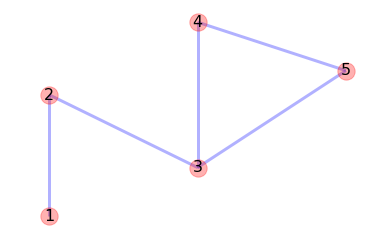

In [2]:
G = nx.Graph()

# Add network
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(4, 5)

# set layout
pos = {1:(1,1),2:(1,3.5),3:(2,2),4:(2,5),5:(3,4)}

# draw nodes
nx.draw_networkx_nodes(G, pos, alpha=0.3)

# draw edges
nx.draw_networkx_edges(G, pos, width=3, alpha=0.3, edge_color='b')

# draw labels
nx.draw_networkx_labels(G, pos, font_size=16)

# plot plot
plt.axis('off')
plt.show()


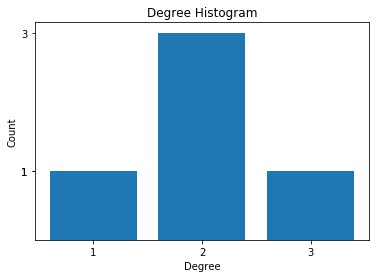

In [3]:
# Degree histogram
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_yticks([c for c in cnt])
plt.show()

# 1.b

In [4]:
# create adjacency matrix
amatrix = nx.adjacency_matrix(G)
amatrix = amatrix.todense()
print(amatrix)

[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 1]
 [0 0 1 0 1]
 [0 0 1 1 0]]


# 1.c

In [5]:
# degree centrality
# the sum of the line of the adjency matrix corresponding to each node, divided by (the number of nodes -1) 
print("the degree centrality for nodes")
degree_centrality = {}
for i in range(len(amatrix)):
    degree_centrality[i+1] = np.sum(amatrix[i])/(len(amatrix)-1)
print(degree_centrality,"\n")

# degree closeness
# per node the sum of te closest distances to other nodes, divided by the nodes-1, to the power -1
print("the closeness centrality for nodes")
closeness_centrality ={}
closeness_centrality[1] = ((1+2+3+3)/4)**-1
closeness_centrality[2] = ((1+1+2+2)/4)**-1
closeness_centrality[3] = ((2+1+1+1)/4)**-1
closeness_centrality[4] = ((1+1+2+3)/4)**-1
closeness_centrality[5] = ((1+1+2+3)/4)**-1
print(closeness_centrality)

the degree centrality for nodes
{1: 0.25, 2: 0.5, 3: 0.75, 4: 0.5, 5: 0.5} 

the closeness centrality for nodes
{1: 0.4444444444444444, 2: 0.6666666666666666, 3: 0.8, 4: 0.5714285714285714, 5: 0.5714285714285714}


In [6]:
# calculated using a library to check for correctness
print("the degree centrality for nodes")
print(nx.degree_centrality(G),"\n")
print("the closeness centrality for nodes")
print(nx.closeness_centrality(G))

the degree centrality for nodes
{1: 0.25, 2: 0.5, 3: 0.75, 4: 0.5, 5: 0.5} 

the closeness centrality for nodes
{1: 0.4444444444444444, 2: 0.6666666666666666, 3: 0.8, 4: 0.5714285714285714, 5: 0.5714285714285714}


# 1.d

In [7]:
''''You want to know the amount of 1's you have in each row of the adjacency matrix. 
If you want to know you can just multiply the adjacency matrix with a vector full of 1's. This will leave 
the amount of ones in each row in the corresponding 'row' of the vector.'''

countVec = np.array([1] * len(amatrix))
countVec = np.array(amatrix) @ countVec

print("The vector of the degree per vertex:")
for i in range(len(countVec)):
    print("node",i+1,"->", countVec[i])

The vector of the degree per vertex:
node 1 -> 1
node 2 -> 2
node 3 -> 3
node 4 -> 2
node 5 -> 2


# 1.e

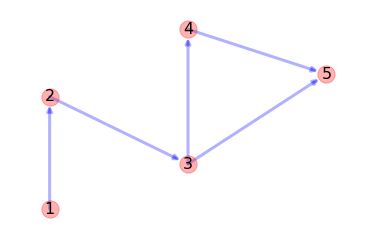

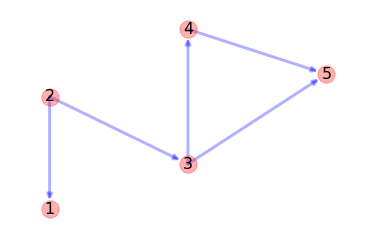

In [8]:
H = nx.DiGraph()

# Add network
H.add_edge(1, 2)
H.add_edge(2, 3)
H.add_edge(3, 4)
H.add_edge(3, 5)
H.add_edge(4, 5)

pos = {1:(1,1),2:(1,3.5),3:(2,2),4:(2,5),5:(3,4)}
nx.draw_networkx_nodes(H, pos, alpha=0.3)
nx.draw_networkx_edges(H, pos, width=3, alpha=0.3, edge_color='b')
nx.draw_networkx_labels(H, pos, font_size=16)
plt.axis('off')
plt.show()


H = nx.DiGraph()

# Add network
H.add_edge(2, 1)
H.add_edge(2, 3)
H.add_edge(3, 4)
H.add_edge(3, 5)
H.add_edge(4, 5)

pos = {1:(1,1),2:(1,3.5),3:(2,2),4:(2,5),5:(3,4)}
nx.draw_networkx_nodes(H, pos, alpha=0.3)
nx.draw_networkx_edges(H, pos, width=3, alpha=0.3, edge_color='b')
nx.draw_networkx_labels(H, pos, font_size=16)
plt.axis('off')
plt.show()



As can be seen from the two plotted networks, between node 1 and node 2 only two possible directions can exist. In the top plot, from node 2 node 1 can't be reached. In the bottom plot, from node 1 node 2 and any of the other nodes can't be reached, The same goes for the connection between 2 and 3. There is no alternative route you could take. Thus, no such ’directionalization’ exists such that from all vertices you could reach (or infect) the entire network.

# 1.f

In [9]:
# https://www.geeksforgeeks.org/clustering-coefficient-graph-theory/
print("Local clustering coefficient")
print(nx.clustering(G))

Local clustering coefficient
{1: 0, 2: 0, 3: 0.3333333333333333, 4: 1.0, 5: 1.0}


# 1.g

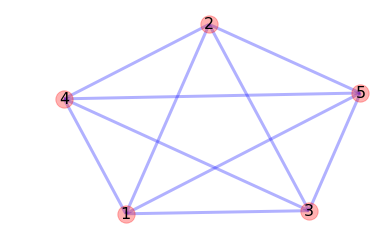

5 edges need to be added for the following local clustering coefficients:
{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}


In [10]:
G = nx.Graph()

# add network
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(4, 5)

# add minimum number of edges (5) so that the clustering coefficient is 1 for every vertex
# this is the minimum because every vertex has to be connected to overy other vertex
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(1, 5)
G.add_edge(2, 4)
G.add_edge(2, 5)

# set layout
pos = nx.spring_layout(G)

# draw nodes
nx.draw_networkx_nodes(G, pos, alpha=0.3)

# draw edges
nx.draw_networkx_edges(G, pos, width=3, alpha=0.3, edge_color='b')

# draw labels
nx.draw_networkx_labels(G, pos, font_size=16)

# plot plot
plt.axis('off')
plt.show()

print("5 edges need to be added for the following local clustering coefficients:")
print(nx.clustering(G))

Only 5 edges need to be added, because for every node to have a local clustering coefficient of 1. That would mean that every cell's neigbors must form a clique together. Which would then mean that every cell would need to be in a clique with every other cell, thus the graph needs to be a clique and thus be a complete graph. For a graph to be complete it needs n(n - 1) / 2 edges. Which in this case would be 5 * 4 / 2 = 10 edges. As we had 5 already, we indeed just needed to add another 5 to transform G into a complete graph and leave every node with a local clustering coefficient of 1.

# 2.a

![title](lab7_img/2a.jpg)

The right type of probability distribution is binominal. For big N's the probability distribution will be a poisson distribution. The expected value of k for a single vertex will always be the avarage k as this will be most likely for a randomly connected graph such as a Erdos-Reyni network. 

\begin{align}
    P(deg(v) = k) = \binom{n - 1}{k}P^k\cdot (1-P)^{n - 1 - k}
\end{align}

As for bigger or non-static graphs finding N can be difficult or even impossible there is another distribution which works for graphs where n -> $\infty$, basically big graphs and np = constant. this would be the poisson distribution:

\begin{align}
    P(deg(v) = k) = \frac{np^k \cdot e^{-np}}{k!}
\end{align}

# 2.b

information comes from: https://math.stackexchange.com/questions/2198231/for-a-vertex-with-degree-k-what-is-the-probability-that-its-clustering-coeffi

There are $\binom{k}{2}$ potential edges among the vertex's neighbors. For each such edge, the probability for it to be in the random graph is p. Thus the total number of edges, denoted as X, among the neighbors follow the binomial distribution. Which is:

$$
P\left(\frac{X}{\binom{k}{2}} \ | \ t \right) = P\left(X \ | \ t(\binom{k}{2}) \right) = \binom{\binom{k}{2}}{t\cdot \binom{k}{2}}\cdot P^{t\cdot \binom{k}{2}}\cdot (1-P)^{\binom{k}{2}-t\cdot \binom{k}{2}}
$$

# 2.c

source used: https://math.stackexchange.com/questions/2200452/expected-local-clustering-coefficient-for-a-node-in-a-network

x is the vertex we are examining.

The local clustering coefficient of a vertex x in graph G is the fraction of vertex pairs in the neighborhood of x that have an edge between them.

The expected local clustering coefficient is

\begin{align}
    E[c(x)] = \\ E[E[c(x)|x]] = \\ E\left [E \left [\frac{N_{neighbor \ edges \ x}}{\binom{k}{2}} | x\right]\right] = \\
    E\left[\sum_{i = 0}^{\binom{k}{2}} binom(i, k, p) \frac{i}{\binom{k}{2}} | x\right] =\\
    \sum_{k = 0}^{N-1} P(deg = k) \sum_{i = 0}^{\binom{k}{2}} binom(i, k, p) \frac{i}{\binom{k}{2}} = \\
    \sum_{k = 0}^{N-1} P(deg = k) \sum_{i = 0}^{\binom{k}{2}} binom(i, \binom{k}{2}, p)
\end{align}
Ofcourse it is important to note that $Binom(i, \binom{k}{2}, p) = \frac{i}{k(k-1) / 2}$ and that $\binom{k}{2} = k(k - 1) / 2$

# 2.d

NE is the collection of edges that are between the neighbors of x.

For this anwer the same source as the one above mentioned was used.

\begin{align}
E\left [E \left [\frac{N_{neighbor \ edges \ x}}{\binom{k}{2}} | x\right]\right] = \\
E\left [\frac{1}{\binom{k}{2}} \sum_{i\in NE}E \left [1 | x \right] \right] = \\
E\left [\frac{1}{\binom{k}{2}} \sum_{i\in NE} P(edge \in NE | x) \right] = \\
E\left [\frac{1}{\binom{k}{2}} \sum_{i\in NE} p \right] = \\
E\left [\frac{1}{\binom{k}{2}} p \binom{k}{2}\right] = \\ p
\end{align}

# 2.e

The expected degree denoted as $< k >$ of a graph is equal to (n - 1)p. This is the case as p is the chance there is a connection between any of the nodes in the graph. And because there are n nodes minus itself so n - 1 nodes the node can connect with. Thus the expected degree of any node would be (n - 1)p = $< k >$. For large graphs the mean k will be usually near 50. As can be seen from the Poission distribution here: 
![title](lab7_img/2e.jpg)

# Epidemics

# 1.a

In [11]:
def prob_not_infected(i,r):
    return (1-i)**r

def prob_infected(i,r):
    return (1-prob_not_infected(i,r))

i = 0.5
r = 2

print("prob not infected:",prob_not_infected(i,r))
print("prob infected:",prob_infected(i,r))

prob not infected: 0.25
prob infected: 0.75


# 1.b

In [12]:
# function for plotting
def plot1b(N,k,i,initial_infected_prob,timesteps):
    # create network
    G = nx.fast_gnp_random_graph(N,k / N)

    # infect initial nodes
    for node in range(N):
        if random.random() < initial_infected_prob:
            G.nodes[node]['infected'] = True
        else:
            G.nodes[node]['infected'] = False

    infected_nodes = []

    # initiate progress bar
    f = IntProgress(min=1, max=timesteps)
    display(f)

    # perform timesteps
    for x in range(timesteps):
        # for all nodes
        infected_per_timestep = 0
        for node in range(N):
            if G.nodes[node]['infected'] is True:
                infected_per_timestep += 1
            # for all neighbors
            neighbors = nx.all_neighbors(G,node)
            infected_neighbors = 0
            for neighbor in neighbors:
                if G.nodes[neighbor]['infected'] is True:
                    infected_neighbors += 1
            # infect node if needed
            if random.random() < prob_infected(i,infected_neighbors):
                G.nodes[node]['infected'] = True
        infected_nodes.append(infected_per_timestep/N)
        f.value = x+1 # update progress bar

    return infected_nodes

In [13]:
# set variables
initial_infected_prob = 0.001
timesteps = 300
simulations = 2

# case i
N = 10**4
k = 5.0
i = 0.01
print("calculation progress case i")
case_iB = plot1b(N,k,i,initial_infected_prob,timesteps)
for _ in range(simulations-1):
    case_iB = np.vstack([case_iB,plot1b(N,k,i,initial_infected_prob,timesteps)])
if simulations > 1:
    case_iB = np.mean(case_iB, axis=0)

# case ii
N = 10**4
k = 0.8
i = 0.1
print("calculation progress case ii")
case_iiB = plot1b(N,k,i,initial_infected_prob,timesteps)
for _ in range(simulations-1):
    case_iiB = np.vstack([case_iiB,plot1b(N,k,i,initial_infected_prob,timesteps)])
if simulations > 1:
    case_iiB = np.mean(case_iiB, axis=0)


calculation progress case i


IntProgress(value=1, max=300, min=1)

IntProgress(value=1, max=300, min=1)

calculation progress case ii


IntProgress(value=1, max=300, min=1)

IntProgress(value=1, max=300, min=1)

[]

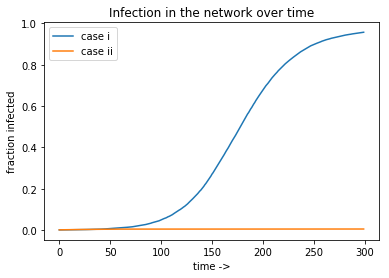

In [14]:
# plot
plt.xlabel("time ->")
plt.ylabel("fraction infected")
plt.title("Infection in the network over time")
plt.plot(case_iB, label = 'case i')
plt.plot(case_iiB, label = 'case ii')
plt.legend()
plt.plot()

# 1.c

Because < k > is smaller than 1 the graph is classified as subcritical and thus there is no giant component present. Because this is the case speading across the network is not possible because of the low connectivity. The infection stays and grows only in local parts of the network.

# 1.d

In [15]:
def prob_that_vertex_with_k_neighbors_infects_at_least_one(i,k):
    return prob_infected(i,k)

i = 0.5
k = 2
print("prob_that_vertex_with_k_neighbors_infects_at_least_one: ",end="")
print(prob_that_vertex_with_k_neighbors_infects_at_least_one(i,k))

prob_that_vertex_with_k_neighbors_infects_at_least_one: 0.75


# 1.e

In [16]:
def prob_that_vertex_with_k_neighbors_infects_at_least_one_numerically(N,k,i,initial_infected_prob):
    # create network
    G = nx.fast_gnp_random_graph(N,k / N)

    # infect initial nodes
    for node in range(N):
        if random.random() < initial_infected_prob:
            G.nodes[node]['infected'] = True
        else:
            G.nodes[node]['infected'] = False
            
    # find nodes with k edges and the corresponding number of infected neighbors
    nodewithkedges = []
    n_infectedneighbors = []
    for node in range(N):
        neighbors = nx.all_neighbors(G,node)
        edgecount = 0
        infectedneighborcount = 0
        for neighbor in neighbors:
            edgecount += 1
            if G.nodes[neighbor]['infected'] is True:
                infectedneighborcount += 1

        if edgecount == int(round(k)):
            if G.nodes[node]['infected'] is True:
                nodewithkedges.append(node)
                n_infectedneighbors.append(infectedneighborcount)

    # perform timestap
    for node in range(N):
        if G.nodes[node]['infected'] is True:
            pass

        # for all neighbors
        neighbors = nx.all_neighbors(G,node)
        infected_neighbors = 0
        for neighbor in neighbors:
            if G.nodes[neighbor]['infected'] is True:
                infected_neighbors += 1

        # infect node if needed
        if random.random() < prob_infected(i,infected_neighbors):
            G.nodes[node]['infected'] = True

            
    n_infectedneighbors_after = []
    for node in nodewithkedges:
        infectedneighborcount = 0
        neighbors = nx.all_neighbors(G,node)
        for neighbor in neighbors:
            if G.nodes[neighbor]['infected'] is True:
                infectedneighborcount += 1
        n_infectedneighbors_after.append(infectedneighborcount)

    # calculate prob
    prob = 0
    for i in range(len(nodewithkedges)):
        if n_infectedneighbors[i] < n_infectedneighbors_after[i]:
            prob += 1
    if len(nodewithkedges) > 0:
        prob = prob / len(nodewithkedges)
    return prob

# set variables
initial_infected_prob = 0.001
simulations = 10

print("--- case i  ---")
N = 10**5
k = 5.0
i = 0.01

progress = IntProgress(min=-1, max=simulations-1)
display(progress)
print("numerically approach prob:", end="")
avgprob = []
for _ in range(simulations):
    avgprob.append(prob_that_vertex_with_k_neighbors_infects_at_least_one_numerically(N,k,i,initial_infected_prob))
    progress.value = _
avgprob = np.mean(avgprob)
print(avgprob)

print("mathematical approach prob:", end="")
print(prob_that_vertex_with_k_neighbors_infects_at_least_one(i,k))

print("")
print("--- case ii ---")
N = 10**5
k = 0.8
i = 0.1

progress = IntProgress(min=-1, max=simulations-1)
display(progress)
print("numerically approach prob:", end="")
avgprob = []
for _ in range(simulations):
    avgprob.append(prob_that_vertex_with_k_neighbors_infects_at_least_one_numerically(N,k,i,initial_infected_prob))
    progress.value = _
avgprob = np.mean(avgprob)
print(avgprob)

print("mathematical approach prob:", end="")
print(prob_that_vertex_with_k_neighbors_infects_at_least_one(i,k))

--- case i  ---


IntProgress(value=0, max=9, min=-1)

numerically approach prob:0.059752177646914484
mathematical approach prob:0.04900995010000009

--- case ii ---


IntProgress(value=0, max=9, min=-1)

numerically approach prob:0.0946592463776999
mathematical approach prob:0.08083388115987844


# 1.f

In [17]:
# i = prob to get infected
# k = average neighbors
# I = number of infected in timestep 0

print("case i  = ", end="")
N = 10**5
k = 5.0
i = 0.01
I = N*initial_infected_prob
print((1-((1-i)**(k*(I/N))))*(N-I)/I)

print("case ii = ", end="")
N = 10**5
k = 0.8
i = 0.1
I = N*initial_infected_prob
print((1-((1-i)**(k*(I/N))))*(N-I)/I)

case i  = 0.05020016625638579
case ii = 0.08420057549747273


# 1.h

In [18]:
def function_R0_over_time(N,k,i,initial_infected_prob,timesteps,n_simulations):

    # initiate progress bar
    f = IntProgress(min=0, max=(timesteps*n_simulations))
    count = 0
    display(f)

    R0_avg = [0]*(timesteps-1)

    # for every simulation
    for s in range(n_simulations):

        # create network
        G = nx.fast_gnp_random_graph(N,k / N)

        # infect initial nodes
        for node in range(N):
            if random.random() < initial_infected_prob:
                G.nodes[node]['infected'] = True
            else:
                G.nodes[node]['infected'] = False

        infected_nodes = []
        R0_over_time = []

        # perform timesteps
        for t in range(timesteps):

            # for all nodes
            infected_per_timestep = 0
            infected_after_timestep = 0
            for node in range(N):

                # count infected nodes before timestep
                if G.nodes[node]['infected'] is True:
                    infected_per_timestep += 1

                # for all neighbors
                neighbors = nx.all_neighbors(G,node)
                infected_neighbors = 0
                for neighbor in neighbors:
                    if G.nodes[neighbor]['infected'] is True:
                        infected_neighbors += 1

                # infect node if needed
                if random.random() < prob_infected(i,infected_neighbors):
                    G.nodes[node]['infected'] = True

                # count infected nodes after timestep
                if G.nodes[node]['infected'] is True:
                    infected_after_timestep += 1

            # calculate and save R0
            if t < timesteps:
                R0_over_time.append( (infected_after_timestep - infected_per_timestep) / (infected_per_timestep) )

            infected_nodes.append(infected_per_timestep/N)

            count += 1
            f.value = count # update progress bar

        # append R0_over_time to R0_avg
        for _ in range(timesteps - 1):
            R0_avg[_] += R0_over_time[_]

    # average R0_avg by dividing by n_simulations
    for value in range(timesteps-1):
        R0_avg[value] = R0_avg[value]/n_simulations

    return R0_avg

In [19]:
# set variables
initial_infected_prob = 0.1 # should be 0.001, set to lower value for testing since N can than be lower
timesteps = 300
n_simulations = 25

# case i
N = 10**3 # should be 10**5, but set to lower value for emulation speed
k = 5.0
i = 0.01
print("calculation progress case i")
case_i = function_R0_over_time(N,k,i,initial_infected_prob,timesteps,n_simulations)

# case ii
N = 10**3 # should be 10**5, but set to lower value for emulation speed
k = 0.8
i = 0.1
print("calculation progress case ii")
case_ii = function_R0_over_time(N,k,i,initial_infected_prob,timesteps,n_simulations)

calculation progress case i


IntProgress(value=0, max=7500)

calculation progress case ii


IntProgress(value=0, max=7500)

[]

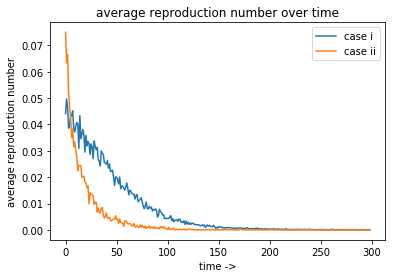

In [20]:
# plot
plt.xlabel("time ->")
plt.ylabel("average reproduction number")
plt.title("average reproduction number over time")
plt.plot(case_i,label = 'case i')
plt.plot(case_ii,label = 'case ii')
plt.legend()
plt.plot()

# 1.g
placed after h because it uses the function defined there

In [21]:
# set variables
initial_infected_prob = 0.001
timesteps = 3
n_simulations = 20

# case i
N = 10**5 # should be 10**5, but set to lower value for emulation speed
k = 5.0
i = 0.01
print("calculation progress case i")
case_i = function_R0_over_time(N,k,i,initial_infected_prob,timesteps,n_simulations)

# case ii
N = 10**5 # should be 10**5, but set to lower value for emulation speed
k = 0.8
i = 0.1
print("calculation progress case ii")
case_ii = function_R0_over_time(N,k,i,initial_infected_prob,timesteps,n_simulations)

calculation progress case i


IntProgress(value=0, max=60)

calculation progress case ii


IntProgress(value=0, max=60)

In [22]:
# beginning is 3 timesteps
# takes the average over n_simulations

print("R0 in beginning case i:",sum(case_i)/float(len(case_i)))
print("R0 in beginning case ii:",sum(case_ii)/float(len(case_ii)))

R0 in beginning case i: 0.05548255930844187
R0 in beginning case ii: 0.07664329572104994


# 1.i

Because at a certain point in time no more uninfected nodes are connected to a infected one. In other words, at a certain point, no more nodes can be infected. Because the top curve has more connections, the infection spreads faster and thus settles faster, resulting in a faster drop to zero.

# 1.j

Because < k > is smaller than 1 for case ii, the graph is classified as subcritical and thus there is no giant component present. Because this is the case speading across the network is not possible because of the low connectivity. The infection stays and grows only in local parts of the network. Since case ii has a larger k, the infection can spread across the entire network and settle to a higher outbreak size.

# 2. a

We cannot use $i$ as $b$ is different from $i$, since $b$ has to take into account the topology of the network. There might be some nodes that are infected already and thus cannot be infected anymore. These will slow down the spreadrate, which if you just say that $i = b$ would not be the case.

# 2. b

\begin{align}
    (1 - (1 - b)^I ) \cdot S = (1 - (1 - i)^{\frac{<k>}{N}I} ) \cdot S \\
    1 - (1 - b)^I = 1 - (1 - i)^{\frac{<k>}{N}I} \\
    (1 - b)^I = (1 - i)^{\frac{<k>}{N}I} \\
    1 - b = \sqrt[I]{(1 - i)^{\frac{<k>}{N}I}} \\
    b = 1 - \sqrt[I]{(1 - i)^{\frac{<k>}{N}I}} \\
\end{align}

# 2. c

case (i):
\begin{align}
    b = 1 - \sqrt[I]{(1 - i)^{\frac{<k>}{N}I}} \\
    \approx 5.03 \cdot 10^{-7}
\end{align}

case (ii):
\begin{align}
    b = 1 - \sqrt[I]{(1 - i)^{\frac{<k>}{N}I}} \\
    \approx 8.43 \cdot 10^{-7}
\end{align}

# 3. a

It is important to first note that $I(t)$ and $S(t)$ need to expressed in the form that we found with $b$ plugged in. And the derivative is necessary for the Euler algorithm. Thus:
\begin{align}
\frac{dI}{dt} = (1 - (1 - b)^{I(t)}) \cdot S(t) \\
\frac{dS}{dt} = -(1 - (1 - b)^{I(t)}) \cdot S(t)\\
\end{align}
Then we will use $I(0) = 0.001N = 100$ and $S(0) = N - I(0) = 99900$ as starting points. To run the Eurler algorithm. 

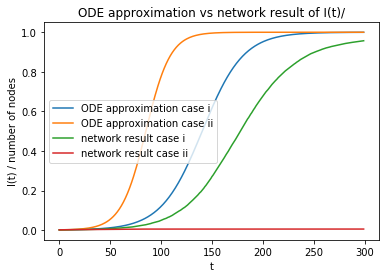

In [23]:
def Euler(i, k, N, b, startI=100, startS=99900, steps=300):
    I = [startI]
    S = [startS]
    for i in range(steps - 1):
        temp = (1 - (1 - b)**I[-1])
        I.append(I[-1] + (temp * S[-1]))
        S.append(S[-1] + (-temp * S[-1]))
    I = np.array(I) / N
    return I, S
    
I1, S1 = Euler(0.01, 5.0, 10**5, 5.03*10**-7)
I2, S2 = Euler(0.1, 0.8, 10**5, 8.43*10**-7)

plt.plot(I1, label="ODE approximation case i")
plt.plot(I2, label="ODE approximation case ii")
plt.plot(case_iB, label = 'network result case i')
plt.plot(case_iiB, label = 'network result case ii')
plt.title('ODE approximation vs network result of I(t)/')
plt.xlabel('t')
plt.ylabel('I(t) / number of nodes')
plt.legend()
plt.show()

# 3. b

The difference we are seeing most likely comes from the fact that in reality the probability of the infected clusters of people being small and isolated is very likely with a low $<k>$. This however is not accounted for in the ODE approximation as we do not account for the topology of the network. For the more connected networks with a higher $<k>$ the assumption of a complete network used by ODE is less of a problem. As can be seen from the results of case i (more connected and more correct) and case ii (less connected and less correct)

# 3. c

It looks like an exponential growth. This is the case as in the beginning the infected nodes are mostly surrounded by susceptible nodes and thus can grow unhindered. But as more nodes become infected, they will act as a barrier or limiter if you'd like to the infection spread. With ODE we assume that will only limit the growth whereas in the model of the network we see that it is the isolation that limits it mostly. In the beginning the growth will look the same because of this, untill isolation stunts the spread in the network model. This can also be seen from the formula:


# 4. a)

In [24]:
def create_power_law_network(N=100000, k=5.0):
    s = nx.utils.powerlaw_sequence(N, 2.5)
    s = s / np.mean(s) * k
    graph_sf = nx.expected_degree_graph(s, selfloops=False)
    return graph_sf

def plot4a(initial_infected_prob, timesteps, i=0.01, N=100000):
    # create network
    G = create_power_law_network()

    # infect initial nodes
    for node in range(N):
        if random.random() < initial_infected_prob:
            G.nodes[node]['infected'] = True
        else:
            G.nodes[node]['infected'] = False

    infected_nodes = []
    infected_degree = []

    # initiate progress bar
    f = IntProgress(min=1, max=timesteps)
    display(f)

    # perform timesteps
    for x in range(timesteps):
        # for all nodes
        infected_per_timestep = 0
        temp = []
        for node in range(N):
            if G.nodes[node]['infected'] is True:
                infected_per_timestep += 1
            # for all neighbors
            neighbors = nx.all_neighbors(G,node)
            infected_neighbors = 0
            for neighbor in neighbors:
                if G.nodes[neighbor]['infected'] is True:
                    infected_neighbors += 1
            # infect node if needed
            if random.random() < prob_infected(i,infected_neighbors):
                G.nodes[node]['infected'] = True
                temp.append(G.degree[node])
        infected_nodes.append(infected_per_timestep/N)
        infected_degree.append(temp)
        f.value = x+1 # update progress bar
    mean_degree = [np.mean(d) for d in infected_degree]
    return infected_nodes, mean_degree

# set variables
initial_infected_prob = 0.001
timesteps = 300

print("calculation progress")
case_iA, case_iAdegree = plot4a(initial_infected_prob, timesteps)


calculation progress


IntProgress(value=1, max=300, min=1)

[]

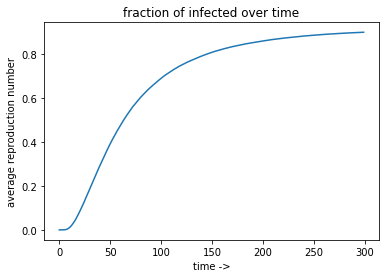

In [25]:
plt.xlabel("time ->")
plt.ylabel("average reproduction number")
plt.title("fraction of infected over time")
plt.plot(case_iA)
plt.plot()

# 4. b)

Compared to the Erdos-Reyni network this curve starts more steep and a lot of infections happen in the first 60-70 timesteps. Then the curve gets less and less steep and the infection speed slows down a lot. This is because in a scale-free network instead of the degree of each node being uniformely distributed with a chance p, now there are less hubs with a lot of connections which normally would not exist in a Erdos-Reyni network (or at least have a very small chance of existing). Additionally all the other nodes on average have a lower degree. Thus the infection spreads quickly, or rather explodes in the beginning once it has reached the main 'hubs' which spread it very fast. Then it slows down as all the nodes connected to the hubs are infected, but all nodes without connections to those hubs with a small degree and no connection still need to be reached. 

# 4. c)

[]

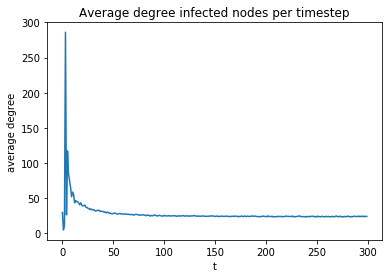

In [26]:
plt.xlabel("t")
plt.ylabel("average degree")
plt.title("Average degree infected nodes per timestep")
plt.plot(case_iAdegree)
plt.plot()

# 4. d)

Based on the figure gotten from 4 c), it is visible that nodes with a high degree are most likely to be infected first, the nodes with lower degrees have less neighbors that can infect them. So will have a lower chance to be infected. This explains why the average degree of infected nodes starts high and sinks lower and lower (fairly quickly) and stays low for most of the as the more connected nodes are infected already and the less connected nodes are the only ones left, yet very hard to infect.